In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")

In [3]:
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# BEFORE cleaning the data
df.shape

(2240, 29)

Income Column have 24 NaN values.

In [6]:
df.isnull().sum(axis = 0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Getting relevant columns and removing the irrelavant ones.

In [7]:
df = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Recency', 'MntWines']]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines
0,5524,1957,Graduation,Single,58138.0,0,58,635
1,2174,1954,Graduation,Single,46344.0,1,38,11
2,4141,1965,Graduation,Together,71613.0,0,26,426
3,6182,1984,Graduation,Together,26646.0,1,26,11
4,5324,1981,PhD,Married,58293.0,1,94,173


## Data Preparation and Data Cleaning

In [8]:
# Remove NaN values in Income Column 
df = df.dropna()
df.reset_index(inplace=True)

In [9]:
pd.DataFrame(df[df['Marital_Status'] == 'Absurd']['Marital_Status'])

,Marital_Status
2070,Absurd
2111,Absurd


In [10]:
# Replace the values in Marital_Status that do not make sense
df.Marital_Status.replace({'Alone':'Single','Absurd':'Single','YOLO':'Single'}
                            ,inplace=True)

In [11]:
# AFTER cleaning the data
df.shape

(2216, 9)

Creating a new column for age (current year: 2022)

In [12]:
# Create a Age Column
ages = []
currYr = 2022
for i in range(df.shape[0]):
    ages.append(currYr - df['Year_Birth'][i])
df['Age'] = ages

Creating a new column on whether kids are present in the household

In [13]:
# Create kidsPresent Column
kidsPresent = []
for i in range(df.shape[0]):
    if df['Kidhome'][i] > 0:
        kidsPresent.append('Yes')
    else:
        kidsPresent.append('No')
df['KidsPresent'] = kidsPresent        

Creating a new column on whether a person is likely to buy wine (based on the amount they spent on wine)

In [14]:
# Create new column on people buying wine
partition = df['MntWines'].quantile(0.3) # Partition at 30 percentile
buyWine = []
for i in range(df.shape[0]):
    if df['MntWines'][i] > partition:
        buyWine.append(True)
    else:
        buyWine.append(False)
df['BuyWine'] = buyWine

Removing Outliers

In [15]:
def removeOutlier(data, columns):
    outlier_list = []
    
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
    
        LL = q1 - 1.5 * iqr
        UL = q3 + 1.5 * iqr
    
        for i in range(data.shape[0]):
            if data[column][i] < LL or data[column][i] > UL:
                outlier_list.append(i)
    
    outlier_list = set(outlier_list)
    new_data = data.drop(outlier_list)
    df.reset_index(inplace=True)
    return new_data

df = removeOutlier(df, ['Income', 'MntWines', 'Age'])

New Dataframe after data cleaning

In [16]:
df.head()

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,Age,KidsPresent,BuyWine
0,0,5524,1957,Graduation,Single,58138.0,0,58,635,65,No,True
1,1,2174,1954,Graduation,Single,46344.0,1,38,11,68,Yes,False
2,2,4141,1965,Graduation,Together,71613.0,0,26,426,57,No,True
3,3,6182,1984,Graduation,Together,26646.0,1,26,11,38,Yes,False
4,4,5324,1981,PhD,Married,58293.0,1,94,173,41,Yes,True


## Exploratory Data Analysis

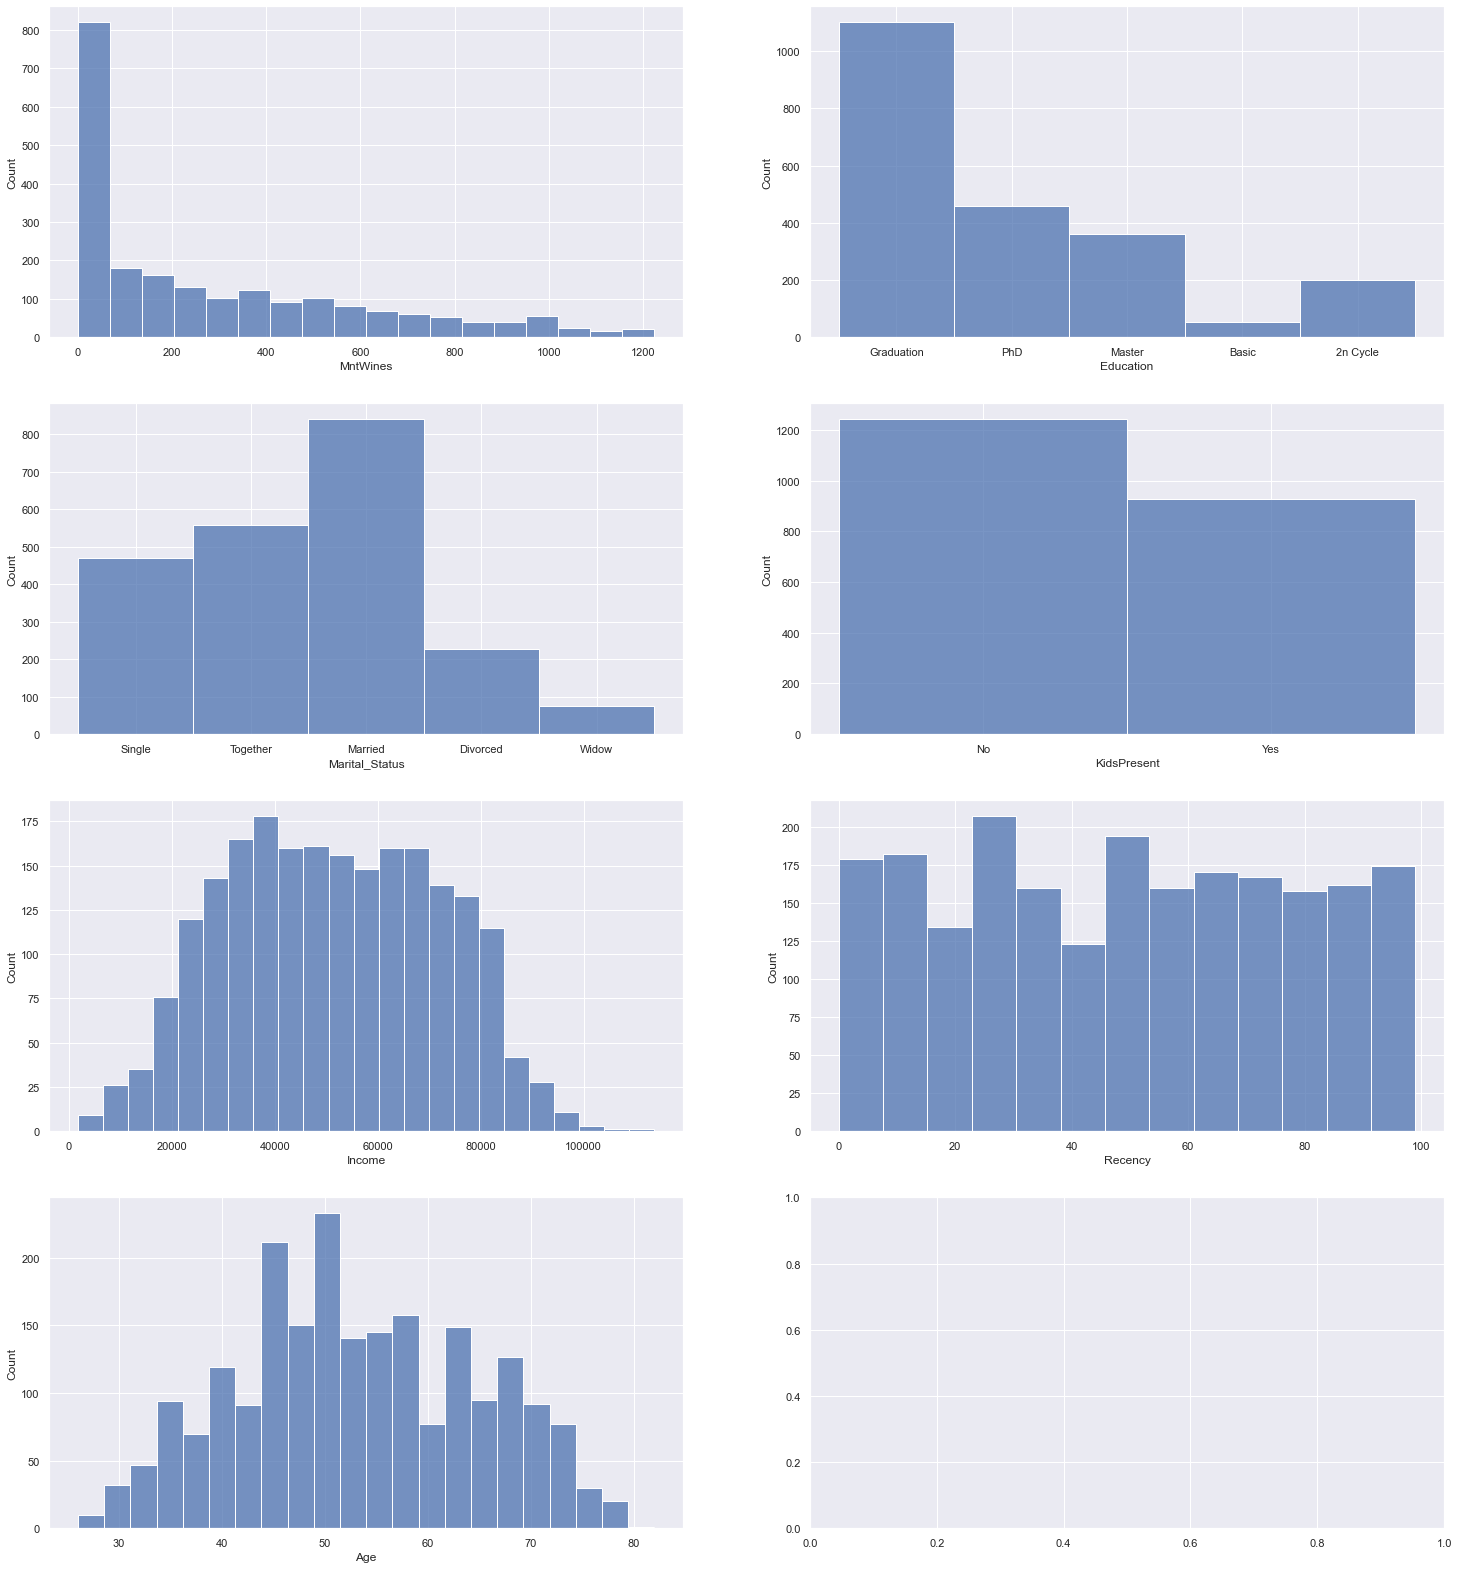

In [17]:
f, axes = plt.subplots(4, 2, figsize=(25, 28))
sb.set(font_scale=2)
sb.histplot(data = df, x= "MntWines", ax=axes[0,0])
sb.histplot(data = df, x= "Education", ax=axes[0,1])
sb.histplot(data = df, x= "Marital_Status", ax=axes[1,0])
sb.histplot(data = df, x= "KidsPresent", ax=axes[1,1])
sb.histplot(data = df, x= "Income", ax=axes[2,0])
sb.histplot(data = df, x= "Recency", ax=axes[2,1])
sb.histplot(data = df, x= "Age", ax=axes[3,0])
sb.set(font_scale=1)

<AxesSubplot:xlabel='MntWines', ylabel='KidsPresent'>

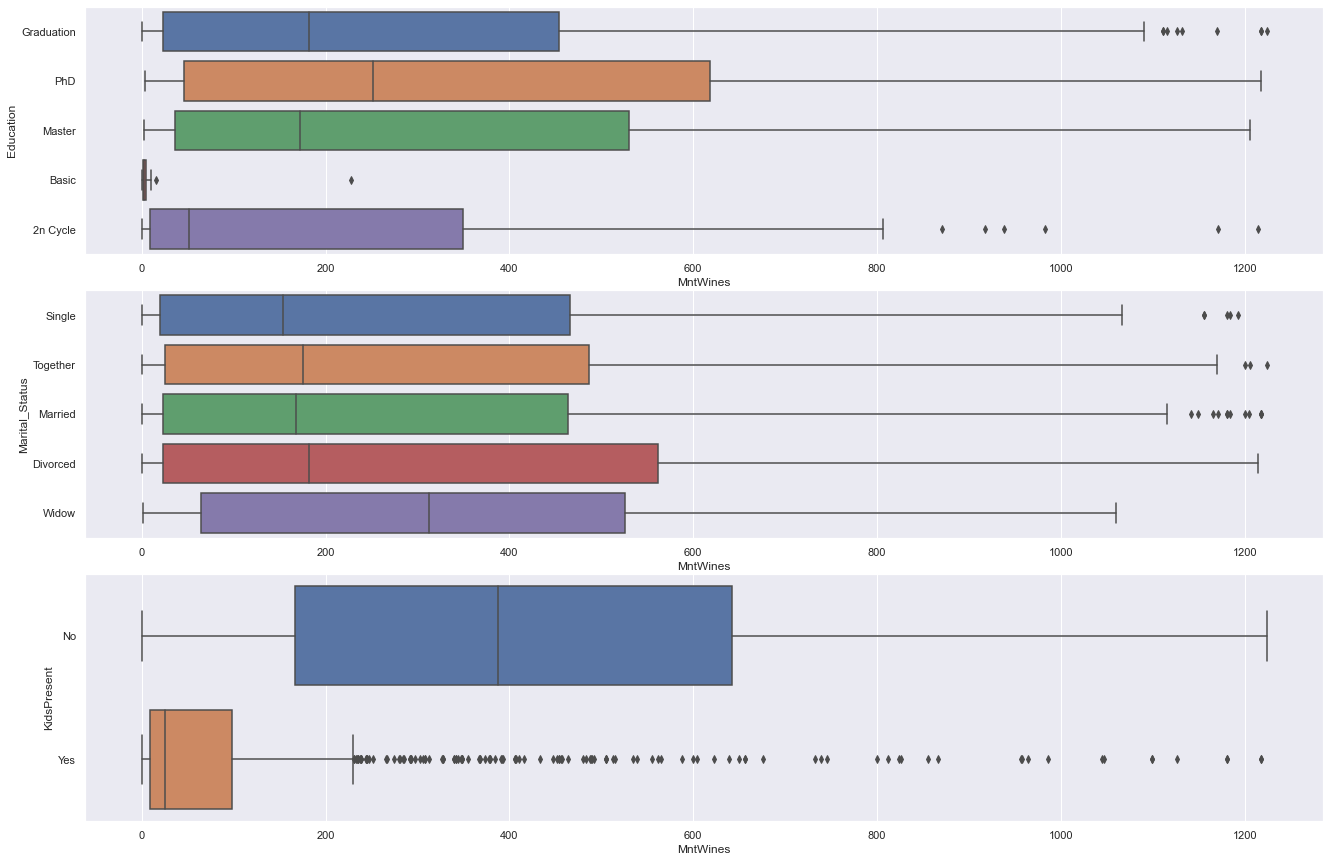

In [18]:
# Create a joint plot
f, axes = plt.subplots(3, 1, figsize=(18, 12))
f.tight_layout()
sb.set(font_scale=2)
sb.boxplot(x = "MntWines", y = "Education", data = df, orient = "h", ax = axes[0])
sb.boxplot(x = "MntWines", y = "Marital_Status", data = df, orient = "h", ax = axes[1])
sb.boxplot(x = "MntWines", y = "KidsPresent", data = df, orient = "h", ax = axes[2])

- Education: Moderate Correlation 
- Marital_Status: Weak Correlation
- KidsPresent: Strong Correlation

<AxesSubplot:xlabel='Recency', ylabel='MntWines'>

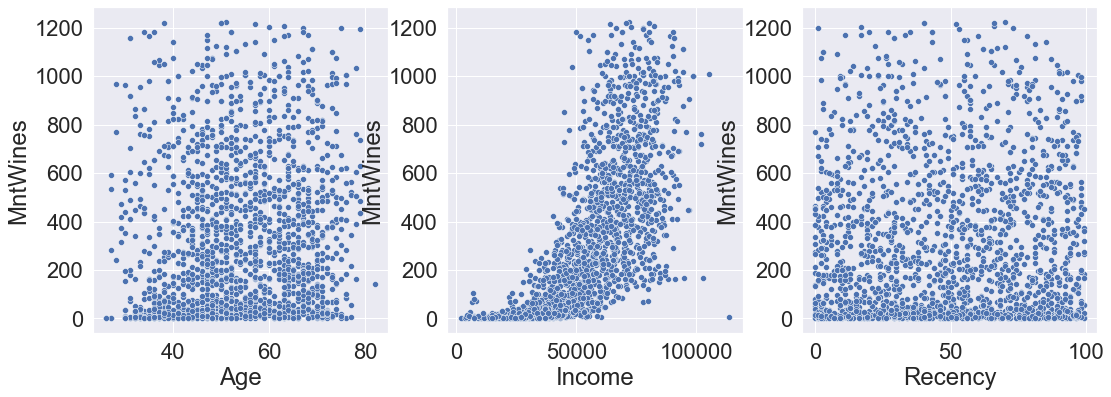

In [19]:
f, axes = plt.subplots(1, 3, figsize=(18, 6))
sb.scatterplot(x = "Age", y = "MntWines", data = df, ax = axes[0])
sb.scatterplot(x = "Income", y = "MntWines", data = df, ax = axes[1])
sb.scatterplot(x = "Recency", y = "MntWines", data = df, ax = axes[2])

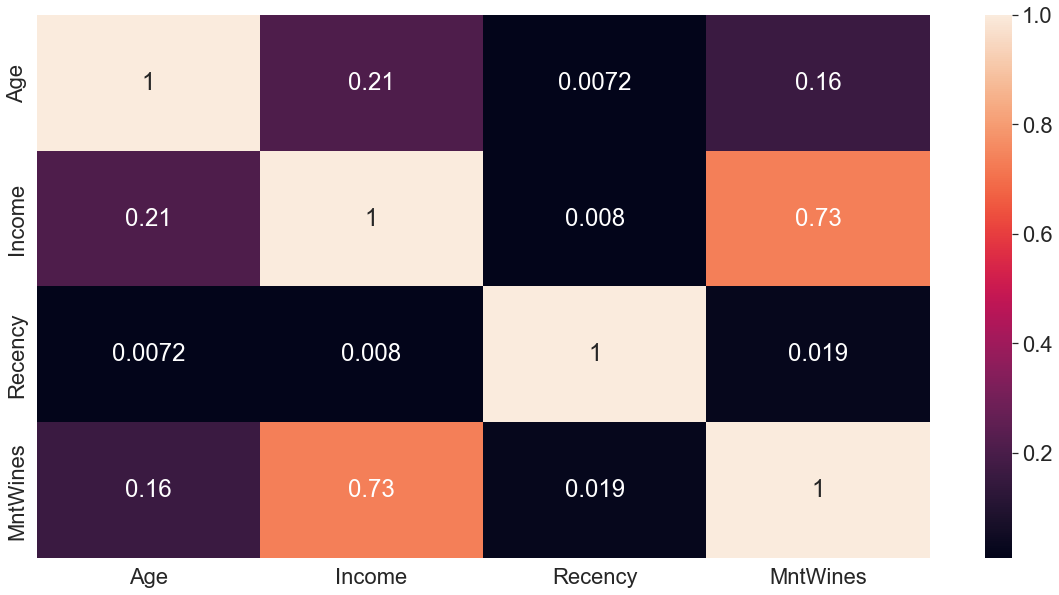

In [20]:
# Correlation Heatmap
new_df = df[['Age', 'Income', 'Recency', 'MntWines']]
fig, ax = plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
sb.heatmap(new_df.corr(), annot = True, ax=ax)
sb.set(font_scale=1)

- Strong Correlation between Income and MntWines (0.73)
- Weak Correlation between Age/Recency and MntWines

## Predict BuyWine using Income

Depth 2

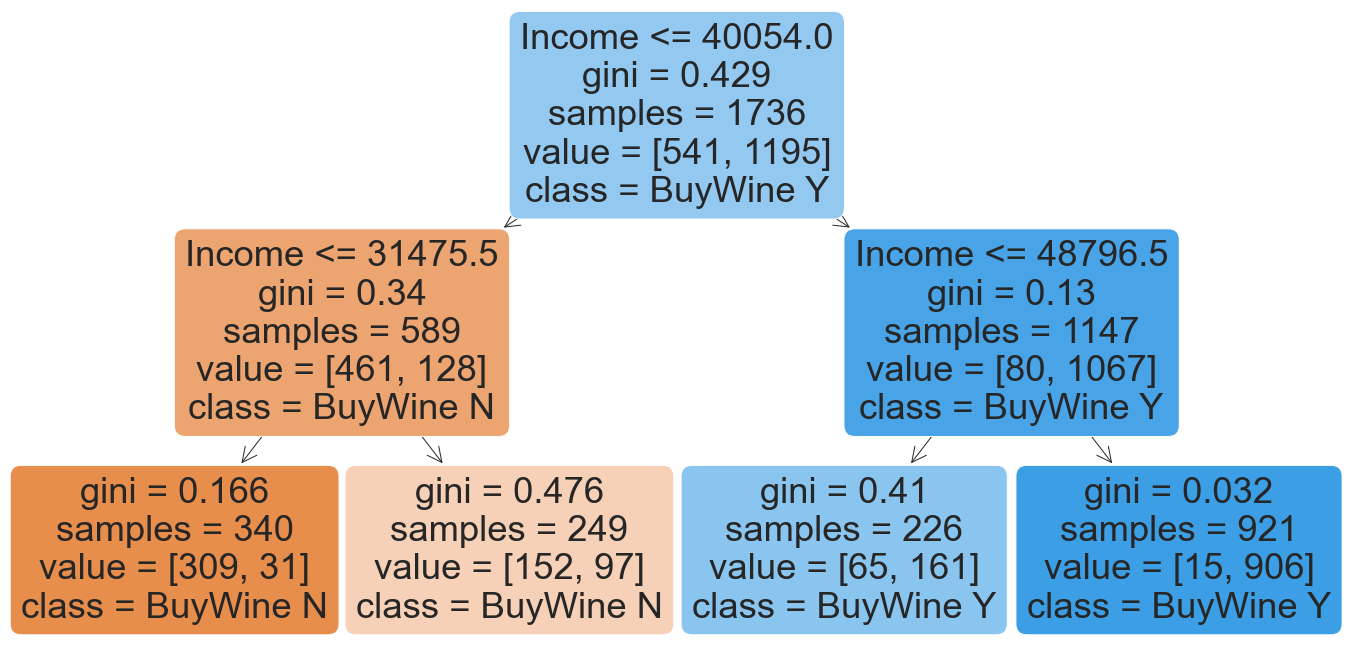

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.880184331797235

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8571428571428571



<AxesSubplot:>

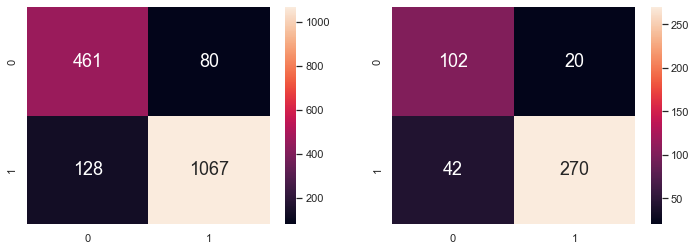

In [21]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(df['BuyWine'])
X = pd.DataFrame(df[["Income"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Income"], 
          class_names=["BuyWine N","BuyWine Y"])
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Depth 4

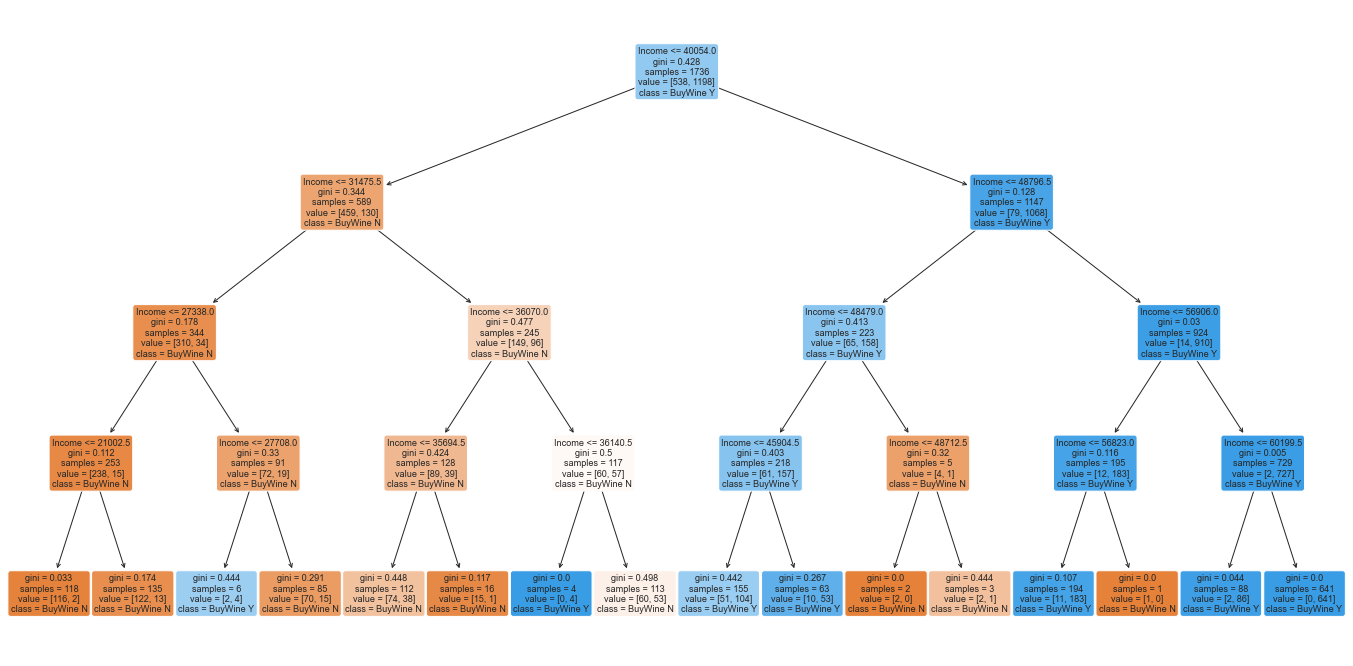

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8853686635944701

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8548387096774194



<AxesSubplot:>

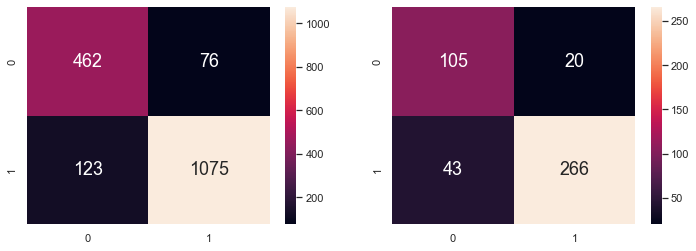

In [22]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(df['BuyWine'])
X = pd.DataFrame(df[["Income"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Income"], 
          class_names=["BuyWine N","BuyWine Y"])
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Predict BuyWine using Recency

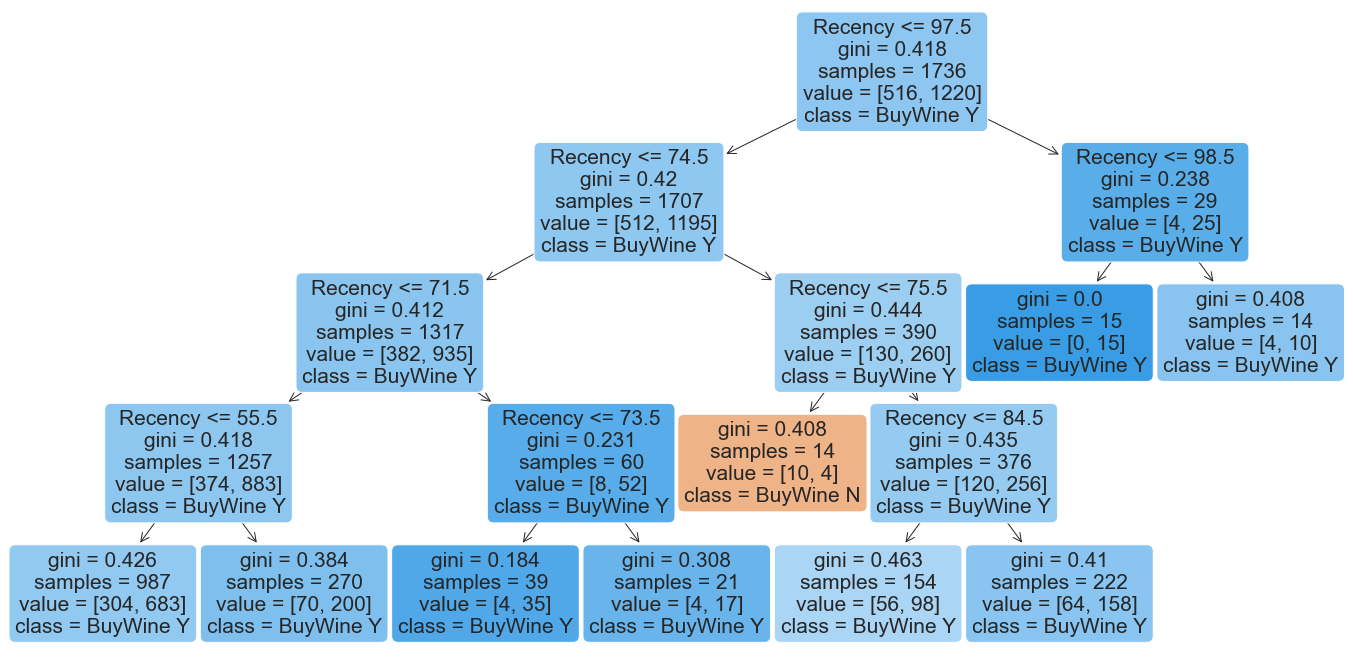

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.706221198156682

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6612903225806451



<AxesSubplot:>

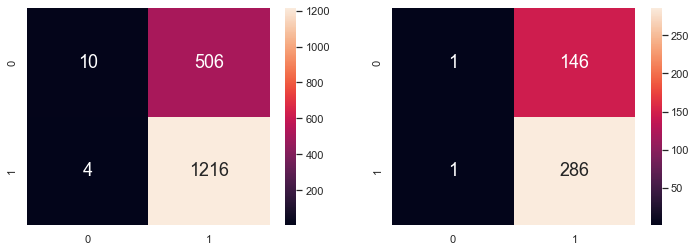

In [23]:
# Extract Response and Predictors
y = pd.DataFrame(df['BuyWine'])
X = pd.DataFrame(df[["Recency"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Recency"], 
          class_names=["BuyWine N","BuyWine Y"])
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Predict BuyWine using Age

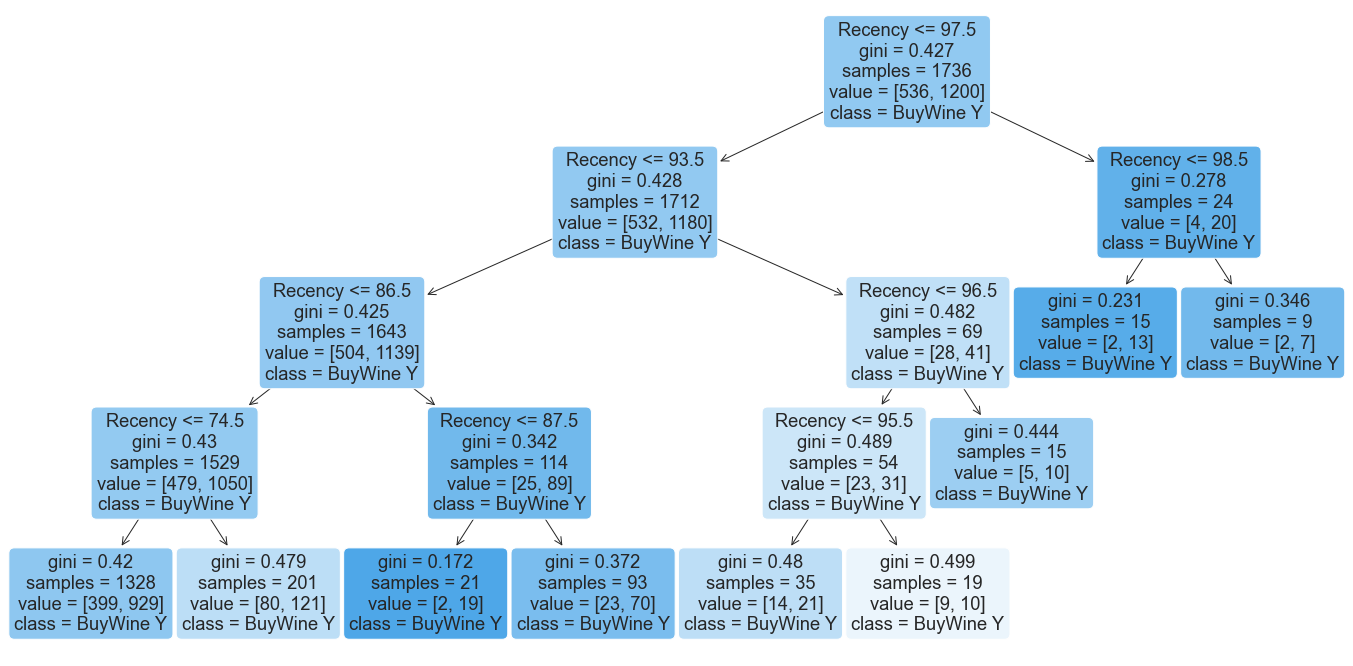

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6912442396313364

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7073732718894009



<AxesSubplot:>

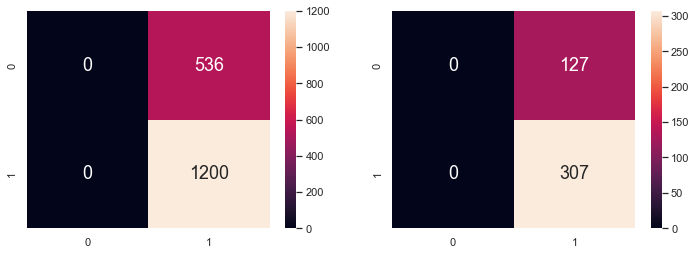

In [24]:
# Extract Response and Predictors
y = pd.DataFrame(df['BuyWine'])
X = pd.DataFrame(df[["Recency"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Recency"], 
          class_names=["BuyWine N","BuyWine Y"])
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Predict BuyWine using Income, Recency, Age

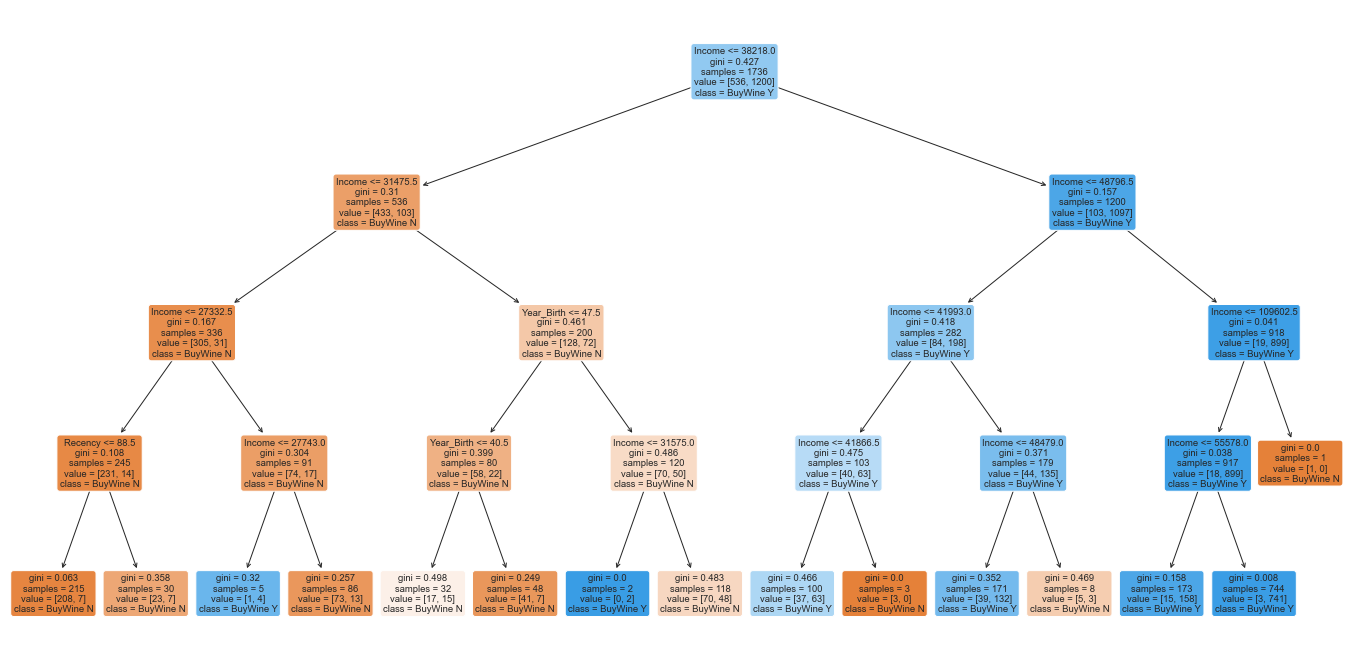

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8876728110599078

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8640552995391705



<AxesSubplot:>

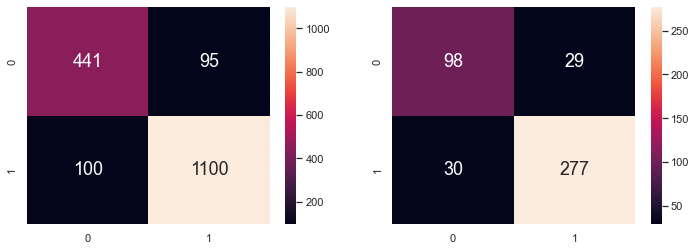

In [25]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(df['BuyWine'])
X = pd.DataFrame(df[["Income", "Recency", "Age"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Income", "Recency", "Year_Birth"], 
          class_names=["BuyWine N","BuyWine Y"])
plt.show()

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Scatter Plot with Kids Present vs MntWines

<AxesSubplot:ylabel='MntWines'>

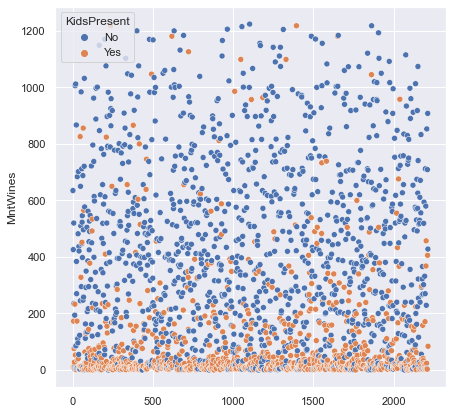

In [26]:
sb.set(font_scale=1)
f = plt.figure(figsize=(7,7))
sb.scatterplot(data=df, x=df.index, y='MntWines', hue='KidsPresent')

# K Means Clustering

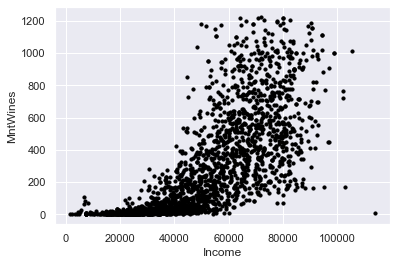

In [27]:
X = df[["MntWines","Income"]]
#Visualise data points

plt.scatter(X["Income"],X["MntWines"],c='black',s=10)
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

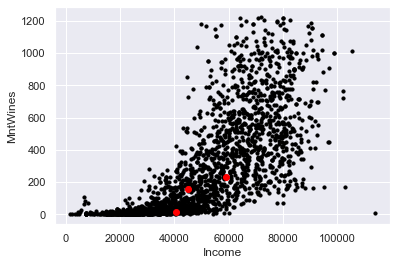

In [28]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Income"],X["MntWines"],c='black',s=10)
plt.scatter(Centroids["Income"],Centroids["MntWines"],c='red')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()

In [29]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Income"]-row_d["Income"])**2
            d2=(row_c["MntWines"]-row_d["MntWines"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X.loc[:,i] = ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X.loc[:,'Cluster'] = C
    Centroids_new = X.groupby(["Cluster"]).mean()[["MntWines","Income"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['MntWines'] - Centroids['MntWines']).sum() + (Centroids_new['Income'] - Centroids['Income']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["MntWines","Income"]]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


1893.1016133918672
985.645539199005
759.4456911132772
591.9547087720053
355.50637072302
456.7058247564351
455.6694262206885
613.8559390468542
385.3124145037727
391.6847486656616
228.47905277562634
132.81373847754534
164.77555523019515
199.29958605632783
230.2362165697157
33.327553952156165
65.1294528401055
31.914461000652555
0.0


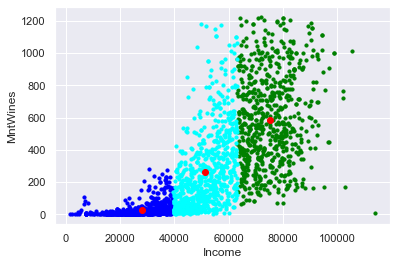

In [30]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Income"],data["MntWines"],c=color[k],s=10)
plt.scatter(Centroids["Income"],Centroids["MntWines"],c='red')
plt.xlabel('Income')
plt.ylabel('MntWines')
plt.show()